<a href="https://colab.research.google.com/github/bismark-joe/deep-object-search/blob/master/Cracked_walls_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop, Adagrad
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np
from google.colab import drive
import zipfile
import warnings
warnings.filterwarnings('ignore')

# Load Datasets

In [ ]:
drive.mount('/content/gdrive')
root_file = 'gdrive/My Drive/Datasets/SDC.zip'
zip_ref= zipfile.ZipFile(root_file, "r")
zip_ref.extractall('SDCF')

rootf2 = 'gdrive/My Drive/Datasets/TDS.zip'
zip_ref2= zipfile.ZipFile(rootf2, "r")
zip_ref2.extractall('TDSF')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Preprocessing

In [ ]:

labels = ['Negative', 'Positive']
img_size = 120
def read_images(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)


Dataset = read_images('SDCF/')
Dataset2 = read_images('TDSF/Test Dataset')


# Data Visualization

Text(0.5, 1.0, 'Number of Images')

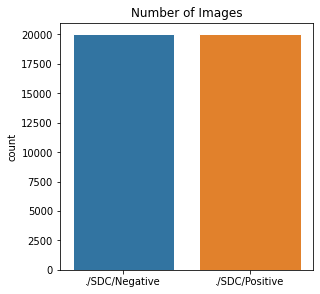

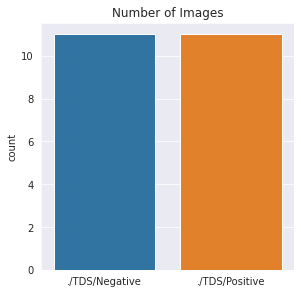

In [ ]:


Im = []
for i in Dataset:
    if(i[1] == 0):
        Im.append("./SDC/Negative")
    elif(i[1] == 1):
        Im.append("./SDC/Positive")

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(Im)
axl.set_title("Number of Images")

Im2 = []
for i in Dataset2:
    if(i[1] == 0):
        Im2.append("./TDS/Negative")
    elif(i[1] == 1):
        Im2.append("./TDS/Positive")

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(Im2)
axl.set_title("Number of Images")

# Normalization of the Data


In [ ]:
x = []
y = []

for feature, label in Dataset:
    x.append(feature)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 1)
x = x / 255
y = np.array(y)


X = []
Y = []

for feature, label in Dataset2:
    X.append(feature)
    Y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 1)
X = X / 255
Y = np.array(Y)

(-0.5, 119.5, 119.5, -0.5)

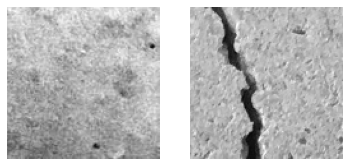

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(x[1000].reshape(img_size, img_size), cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x[30000].reshape(img_size, img_size), cmap='gray')
plt.axis('off')



(-0.5, 119.5, 119.5, -0.5)

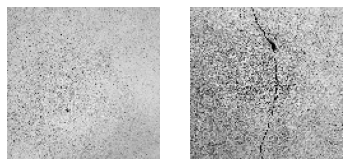

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(X[8].reshape(img_size, img_size), cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(X[16].reshape(img_size, img_size), cmap='gray')
plt.axis('off')

# CNN Model

In [ ]:
model = Sequential()
model.add(Conv2D(64,3,padding="same", activation="relu", input_shape = x.shape[1:]))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 128)      0

# Model Training

In [ ]:
opt = Adam(lr=1e-5)

model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) 

history = model.fit(x, y, epochs = 1, batch_size = 128, validation_split = 0.25, verbose=1)


235/235 [==============================] - 1434s 6s/step - loss: 0.3302 - accuracy: 0.8726 - val_loss: 0.4541 - val_accuracy: 0.9562


#Model Testing

In [ ]:
predictions = model.predict(X)
# summarize the first 5 cases
for i in range(22):
 print('{} (expected {})'.format (predictions[i], Y[i]))


1/1 [==============================] - 0s 372ms/step
[0.1817591 0.8182408] (expected 0)
[0.33470592 0.66529405] (expected 0)
[0.11479943 0.8852006 ] (expected 0)
[0.26849246 0.73150754] (expected 0)
[0.44119602 0.558804  ] (expected 0)
[0.33893555 0.6610644 ] (expected 0)
[0.5232024  0.47679764] (expected 0)
[0.13242576 0.8675742 ] (expected 0)
[0.5335543  0.46644568] (expected 0)
[0.34478736 0.6552126 ] (expected 0)
[0.49248886 0.50751114] (expected 0)
[0.4488408 0.5511592] (expected 1)
[0.42994612 0.57005394] (expected 1)
[0.39840314 0.60159683] (expected 1)
[0.29871655 0.7012834 ] (expected 1)
[0.16697256 0.8330275 ] (expected 1)
[0.20269638 0.79730356] (expected 1)
[0.12114689 0.8788531 ] (expected 1)
[0.361031   0.63896894] (expected 1)
[0.22149138 0.7785086 ] (expected 1)
[0.20132573 0.7986742 ] (expected 1)
[0.20728299 0.792717  ] (expected 1)


In [ ]:
print(history.history.keys())

NameError: ignored

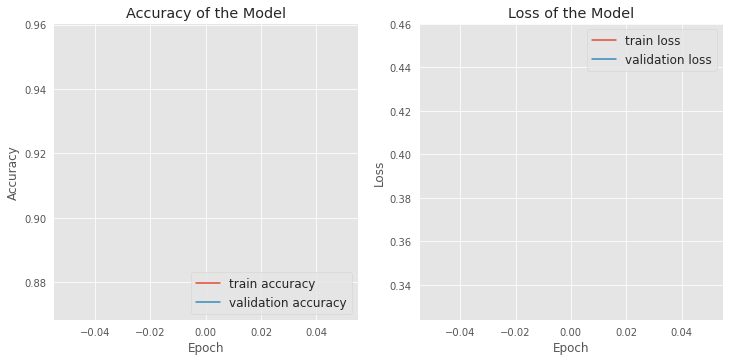

In [ ]:
plt.figure(figsize=(12, 12))
plt.style.use('ggplot')
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right', prop={'size': 12})

plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the Model')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train loss', 'validation loss'], loc='best', prop={'size': 12})

#Classification Report

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_generator(x)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_true=y, y_pred=predictions, target_names = ['Negative','Positive']))